In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../data/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [11]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
savg = test['Fare'][test['Pclass']==3].mean()

In [23]:
test['Fare'].fillna(savg, inplace=True)

In [33]:
train['Embarked'].value_counts(sort=True, ascending=False)
train['Embarked'].fillna('S', inplace=True)

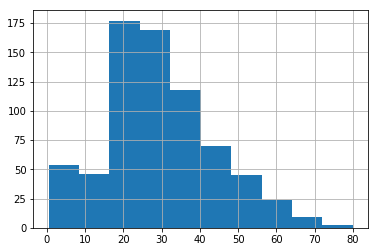

In [38]:
train.Age.hist(bins=10)

In [41]:
age = train['Age']
average = age.sum(axis=0, skipna=True) / len(age)
train['Age'].fillna(average, inplace=True)

age_test = test['Age']
test_average = age_test.sum(axis=0, skipna=True) / len(age)
test['Age'].fillna(test_average, inplace=True)

In [50]:
length_train = len(train)
length_1 = len(train['Cabin'][train['Survived']==1])
length_0 = length_train - length_1

sur = train['Cabin'][train['Survived']==1].isnull().sum() / length_1
non_sur = train['Cabin'][train['Survived']==1].isnull().sum() / length_0

print(sur*100, non_sur*100)

60.23391812865497 37.52276867030965


In [51]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [54]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    deed = train[train['Survived']==0][feature].value_counts()
    dataframe = pd.DataFrame([survived, deed])
    dataframe.index = ['Survived', 'Deed']
    dataframe.plot(kind='bar', stacked=True, figsize=(10, 5))

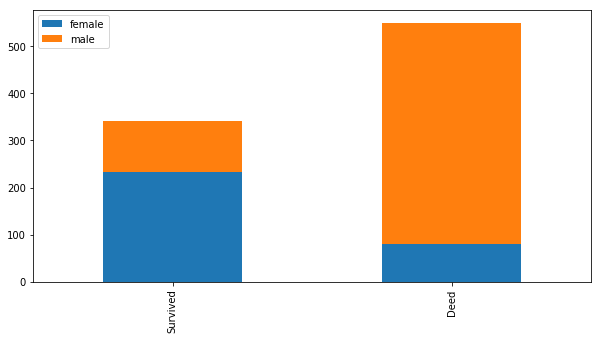

In [56]:
bar_chart('Sex')

In [59]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,23.799293,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [62]:
combined = [train, test]

In [69]:
for i in combined:
    print(j)
    i['Title'] = i['Name'].str.extract(' ([A-Za-z]+)\.', expand =True)
    
train['Title'].value_counts()

0
1


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Sir           1
Countess      1
Ms            1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [86]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [88]:
title_map = {'Mr' : 0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3,'Dona' :3}
for i in combined:
    i['Title'] = i['Title'].map(title_map)


In [90]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [92]:
sex_map = {'male':1, 'female':2}
for i in combined:
    i['Sex'] = i['Sex'].map(sex_map)

In [93]:
for i in combined:
    i.loc[i['Age'] <= 13, 'Age'] = 0,
    i.loc[(i['Age'] > 13) & (i["Age"] <=20), 'Age'] = 1,
    i.loc[(i['Age'] > 20) & (i["Age"] <=30), 'Age'] = 2,
    i.loc[(i['Age'] > 30) & (i["Age"] <=55), 'Age'] = 3,
    i.loc[i['Age'] > 55, 'Age'] = 4

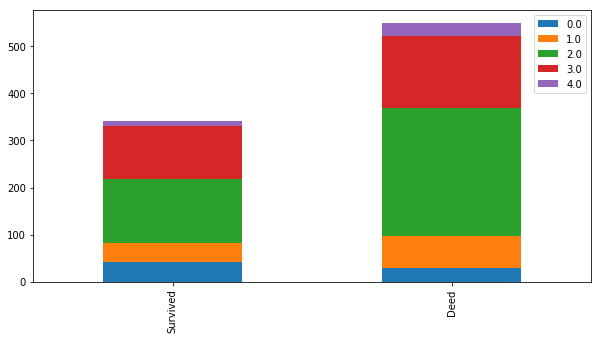

In [94]:
bar_chart('Age')

In [95]:
embarked_map = {'S':0, 'C':1, 'Q':2}
for i in combined:
    i['Embarked'] = i['Embarked'].map(embarked_map)

In [106]:
train['Familysize'] = train['SibSp'] + train['Parch']
test['Familysize'] = test['SibSp'] + test['Parch']

In [108]:
Drop = ['Ticket', 'SibSp', 'Parch']
current_train = train.drop(Drop, axis=1)
current_test = test.drop(Drop, axis=1)

current_train = current_train.drop(['PassengerId'],axis=1)
current_test= current_test.drop(['PassengerId'],axis=1)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = current_train.drop(['Survived'], axis=1)
y = current_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [112]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 7) (223, 7) (668,) (223,)


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=123)

clf = KNeighborsClassifier(n_neighbors=10)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print('K-fold score :', score)
print('Average Accuracy :', round(np.mean(score)*100, 2))

K-fold score : [0.70149254 0.76119403 0.8358209  0.79104478 0.7761194  0.71641791
 0.94029851 0.74626866 0.72727273 0.8030303 ]
Average Accuracy : 77.99
